In [1]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 9.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 21.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 14.6 MB/s

In [1]:
#|default_exp app

# Dogs V Cats

In [6]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

## importing an image for test

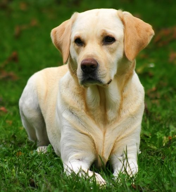

In [7]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192,192))
im


In [8]:
#|export
learn = load_learner('model.pkl')

In [9]:
learn.predict(im)

('False', TensorImage(0), TensorImage([9.9995e-01, 4.6910e-05]))

In [10]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [11]:
classify_image(im)

{'Dog': 0.999953031539917, 'Cat': 4.691004505730234e-05}

In [12]:
!pip install transformers

In [13]:
# gr.Interface(fn=classify_image,inputs.Images(shape=(192,192)), outputs=categories)

In [14]:
import os
os.makedirs("flagged", exist_ok=True)

In [17]:
#|export

# we need radio image
# image = gr.inputs.Image(shape=(192,192))
# we need gradio label
# we need gradio example


# create gradio interface
demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(height=192,width=192),
    outputs=gr.Label(),
    examples=['dog.jpeg']
)

# lanuch the interface
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7862

Could not create share link. Missing file: /opt/conda/lib/python3.11/site-packages/gradio/frpc_linux_aarch64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_aarch64
2. Rename the downloaded file to: frpc_linux_aarch64_v0.2
3. Move the file to this location: /opt/conda/lib/python3.11/site-packages/gradio


In [14]:
gr.__version__

'4.22.0'

# export

In [20]:
# !pip install nbdev

In [21]:
# from nbdev.export import notebook2script

In [22]:
import nbdev 

ModuleNotFoundError: No module named 'nbdev'

In [ ]:
?? nbdev

In [ ]:
from nbdev.nbdev_export import notebook2script

In [ ]:
nbdev_export